# Supervised Learning

In this lab, we will be working on creating a model that predicts whether a horse which has colic will survive based on past medical conditions. The dataset is called Horse Colic Dataset. The column 'outcome' determines what happened to the horse, and will be the label.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [37]:
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [39]:
df.describe() #Only describes numeric columns, not categorical

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [40]:
df.describe(include='object')

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
count,299,299,243,230,252,267,244,255,243,195,193,197,181,134,299,299,299
unique,2,2,4,4,6,3,5,4,4,3,3,4,5,3,3,2,2
top,yes,adult,cool,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,cloudy,lived,yes,no
freq,180,275,108,114,79,187,67,127,75,101,119,79,78,47,178,190,200


## Querying the dataset

Q1. Create any queries which will better help you understand the dataset.

In [ ]:
#TODO



## Data Visualization

Check out the bar plot below showing the outcome of different horses.

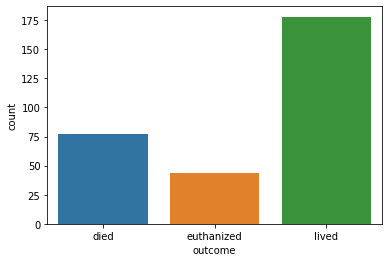

In [41]:
sns.countplot(x='outcome',data=df)

Q2. Make your own visualizations and try to figure out important features. Feel free to use the examples from previous lab, but try to get creative.

In [ ]:
# Plot
#sns.boxplot()

In [ ]:
# Plot


## Fill missing values

Use **fillna()** function in pandas for filling missing values. Make sure all the features have correct dtypes. <br/>
**Numeric**: float or int <br/>
**Categorical**: object or int

In [42]:
# Check features have correct dtype
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [43]:
# Calculate number of NaNs in each column
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

Q3. Fill all NaN values for numeric features with mean.

In [44]:
numerical=[]
categorical=[]
for i in df.columns:
    if(i=='outcome'):
        continue
    else:
        if(df[i].dtype=='int64' or df[i].dtype=='float64'):
            numerical.append(i)
        else:
            categorical.append(i)
numerical
categorical
df[numerical]=df[numerical].fillna(df[numerical].mean())

In [45]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph      0
rectal_exam_feces        102
abdomen                  118
packed_cell_volume         0
total_protein              0
abdomo_appearance        165
abdomo_protein             0
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

Q4. Fill in NaN values for categorical features with mode.

In [46]:
for i in categorical:
    df[i]=df[i].fillna(df[i].value_counts().idxmax())
df.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

## Transformation of Skewed Continuous Features

Sometimes continuous features are distributed such that the values reside near one central value, but there are sometimes a non-trivial amount of larger or smaller values which may negatively affect the learning algorithm. Therefore it is common to perform a transformation such as log transformation on these features.
Let us take an example:

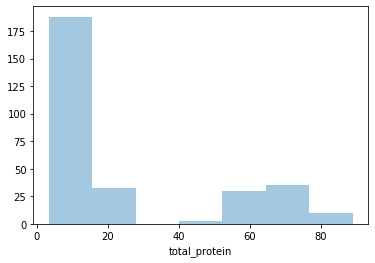

In [47]:
sns.distplot(df['total_protein'],kde = False)

We can see that most of values lie between 0-20, however there are a large amount of data points which are greater than 40. We need to transform this feature.

Q5. Carry out a log transformation on total_protein by applying natural log on all values.

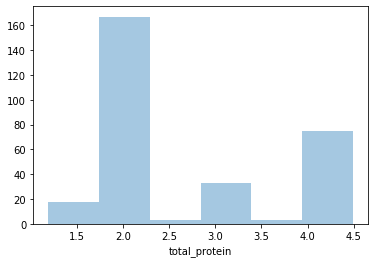

In [48]:

df['total_protein'] = np.log(df['total_protein'])
sns.distplot(df['total_protein'],kde = False)

## Feature Selection

Q6. Select features from the dataset based on your analysis.

In [49]:
numerical_features = numerical
categorical_features = categorical
X = df[numerical_features+categorical_features]
y = df["outcome"]

## Ordinal and One-hot encoding of categorical attributes

In learning algorithms, values are expected to be numeric. However, categorical attributes can provide a lot of information to the model. So the way we incorporate these attributes is by encoding them.

Q7. Encode the categorical variables (Use **pd.get_dummies()** for one-hot encode).

In [ ]:
#TODO

#Ordinal (can also use OrdinalEncoder())

#One-hot


X.head()

## Encoding the labels

One more step before we move on is converting the categorical labels in 'outcome' to numbers. This is called label encoding, and is done with the help of LabelEncoder. Check the sklearn documentation example for help.

Q8. Using LabelEncoder, encode 'outcome'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = None  #Instantiate the encoder
y = None   #Fit and transform the labels using labelencoder

y

## Creating a Train and Test Split

Q9. Create training and validation split on data. Check out train_test_split() function from sklearn to do this.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = None


## Scaling of numeric attributes

Q10. Scale numeric attributes using MinMaxScaler, StandardScaler(Z-score normalization) or RobustScaler. Scale train and validation datasets separately!

In [ ]:
#TODO
from sklearn.preprocessing import RobustScaler

scaler = None  #Instantiate the scaler 
X_train[numerical_features] = None  #Fit and transform the features using scaler
X_val[numerical_features] = None  #Transform the features using scaler

X_train[numerical_features].head()

## Model Selection and Training

Q11. Select 2 classifiers, instantiate them and train them. A few models are given below:
- DecisionTreeClassifier
- GaussianNB
- RandomForestClassifier
- Support Vector Machine
- Any other classifier, look them up!

In [ ]:
# Initialize and train
clf1 = None
clf2 = None

## Cross Validation and Performance Analysis

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_1 = None
y_pred_2 = None

acc1 = None
acc2 = None

print("Accuracy score of clf1: {}".format(acc1))
print("Accuracy score of clf2: {}".format(acc1))

## Hyperparameter Tuning

How do we optimize the classifier in order to produce the best results? We need to tune the model by varying various hyperparameters. We can use GridSearchCV to simplify the whole process.

For GridSearchCV, carry out the following steps(We will only do this for one classifier, so choose one of your previous classifiers):
- Initialize a new classifier object
- Create a dictionary of parameters you wish to tune.(e.g. parameters = {'param_name':[list of values]})
- Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
- Use make_scorer to create an accuracy_score object
- Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
- Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#TODO
clf = None           #Initialize the classifier object

parameters = None    #Dictionary of parameters

scorer = None        #Initialize the scorer using make_scorer

grid_obj = None      #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = None      #Fit the gridsearch object with X_train,y_train

best_clf = None      #Get the best estimator. For this, check documentation of GridSearchCV object

unoptimized_predictions = None      #Using the unoptimized classifiers, generate predictions
optimized_predictions = None        #Same, but use the best estimator

acc_unop = None       #Calculate accuracy for unoptimized model
acc_op = None         #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))

We have learnt some methods to boost our accuracy. Try messing around with the above functions and bring up model performance.